In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


/home/sergio/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Import ErichRLib

In [2]:
import EnrichRLib as erl

/home/sergio/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sergio/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Gene list may be imported from file or direct entered in code as list object

In [3]:
gl = [  'CD3E', 'BLK', 'PTPN22', 'PAG1', 'CTLA4', 'PIK3CD', 'LAT2', 'CSK', 
        'CD247', 'CD3G', 'THEMIS', 'PSMB8', 'LCP2', 'GATA3', 'LAT', 'SLA2', 
        'SKAP1', 'TRAT1', 'BCL2', 'CD3D', 'THY1','RUNX1', 'BLK', 'PTPN22']


# Fetching gene sets from Enrichr website 

In [18]:
# sub directory where gene sets in .gmt format will be placed
lib_dir='_tmp'

# List of gene sets to fetch, by default all gene sets will be fetched
gss = [ 
       'GO_Biological_Process_2018',
       'GO_Cellular_Component_2018',
       'GO_Molecular_Function_2018',
       'KEGG_2016',
       'Reactome_2016'
       ]

#erl.get_Enrichr(out_dir='_tmp', libs=gss)

# Enrichment of single gene set

In [29]:
# gene set name and file name
gsn = 'Reactome_2016'
gs_fn =lib_dir+'/'+gsn+'.gmt'

# read gmt to python dictionary
gs = erl.read_gmt(gs_fn)

#print(gs['Formation of Incision Complex in GG-NER_Homo sapiens_R-HSA-5696395'])

In [12]:
#df_gs = pd.DataFrame.from_dict(gs, orient='index')

In [22]:
from os.path import join
def df_from_gs(gs):
    df = pd.DataFrame(index=gs.keys(), columns=[ 'term_genes']) 
    for term, g in gs.items():
        df.loc[term]['term_genes']  = list(g)
    
    return df

def df_from_gss(gss, path_lib='EnrichrLibs'):
    df_gss = pd.DataFrame()
    for gs in gss:
        pl = erl.read_gmt(join(path_lib,gs)+'.gmt')
        df_gs = df_from_gs(pl)
        df_gss = pd.concat([df_gs,df_gss])
    
    return df_gss


df_gs = df_from_gs(gs)
df_gss = df_from_gss(gss)

In [31]:
len(enr)

#dj = erl.jaccard_matrx(df_gs)

219

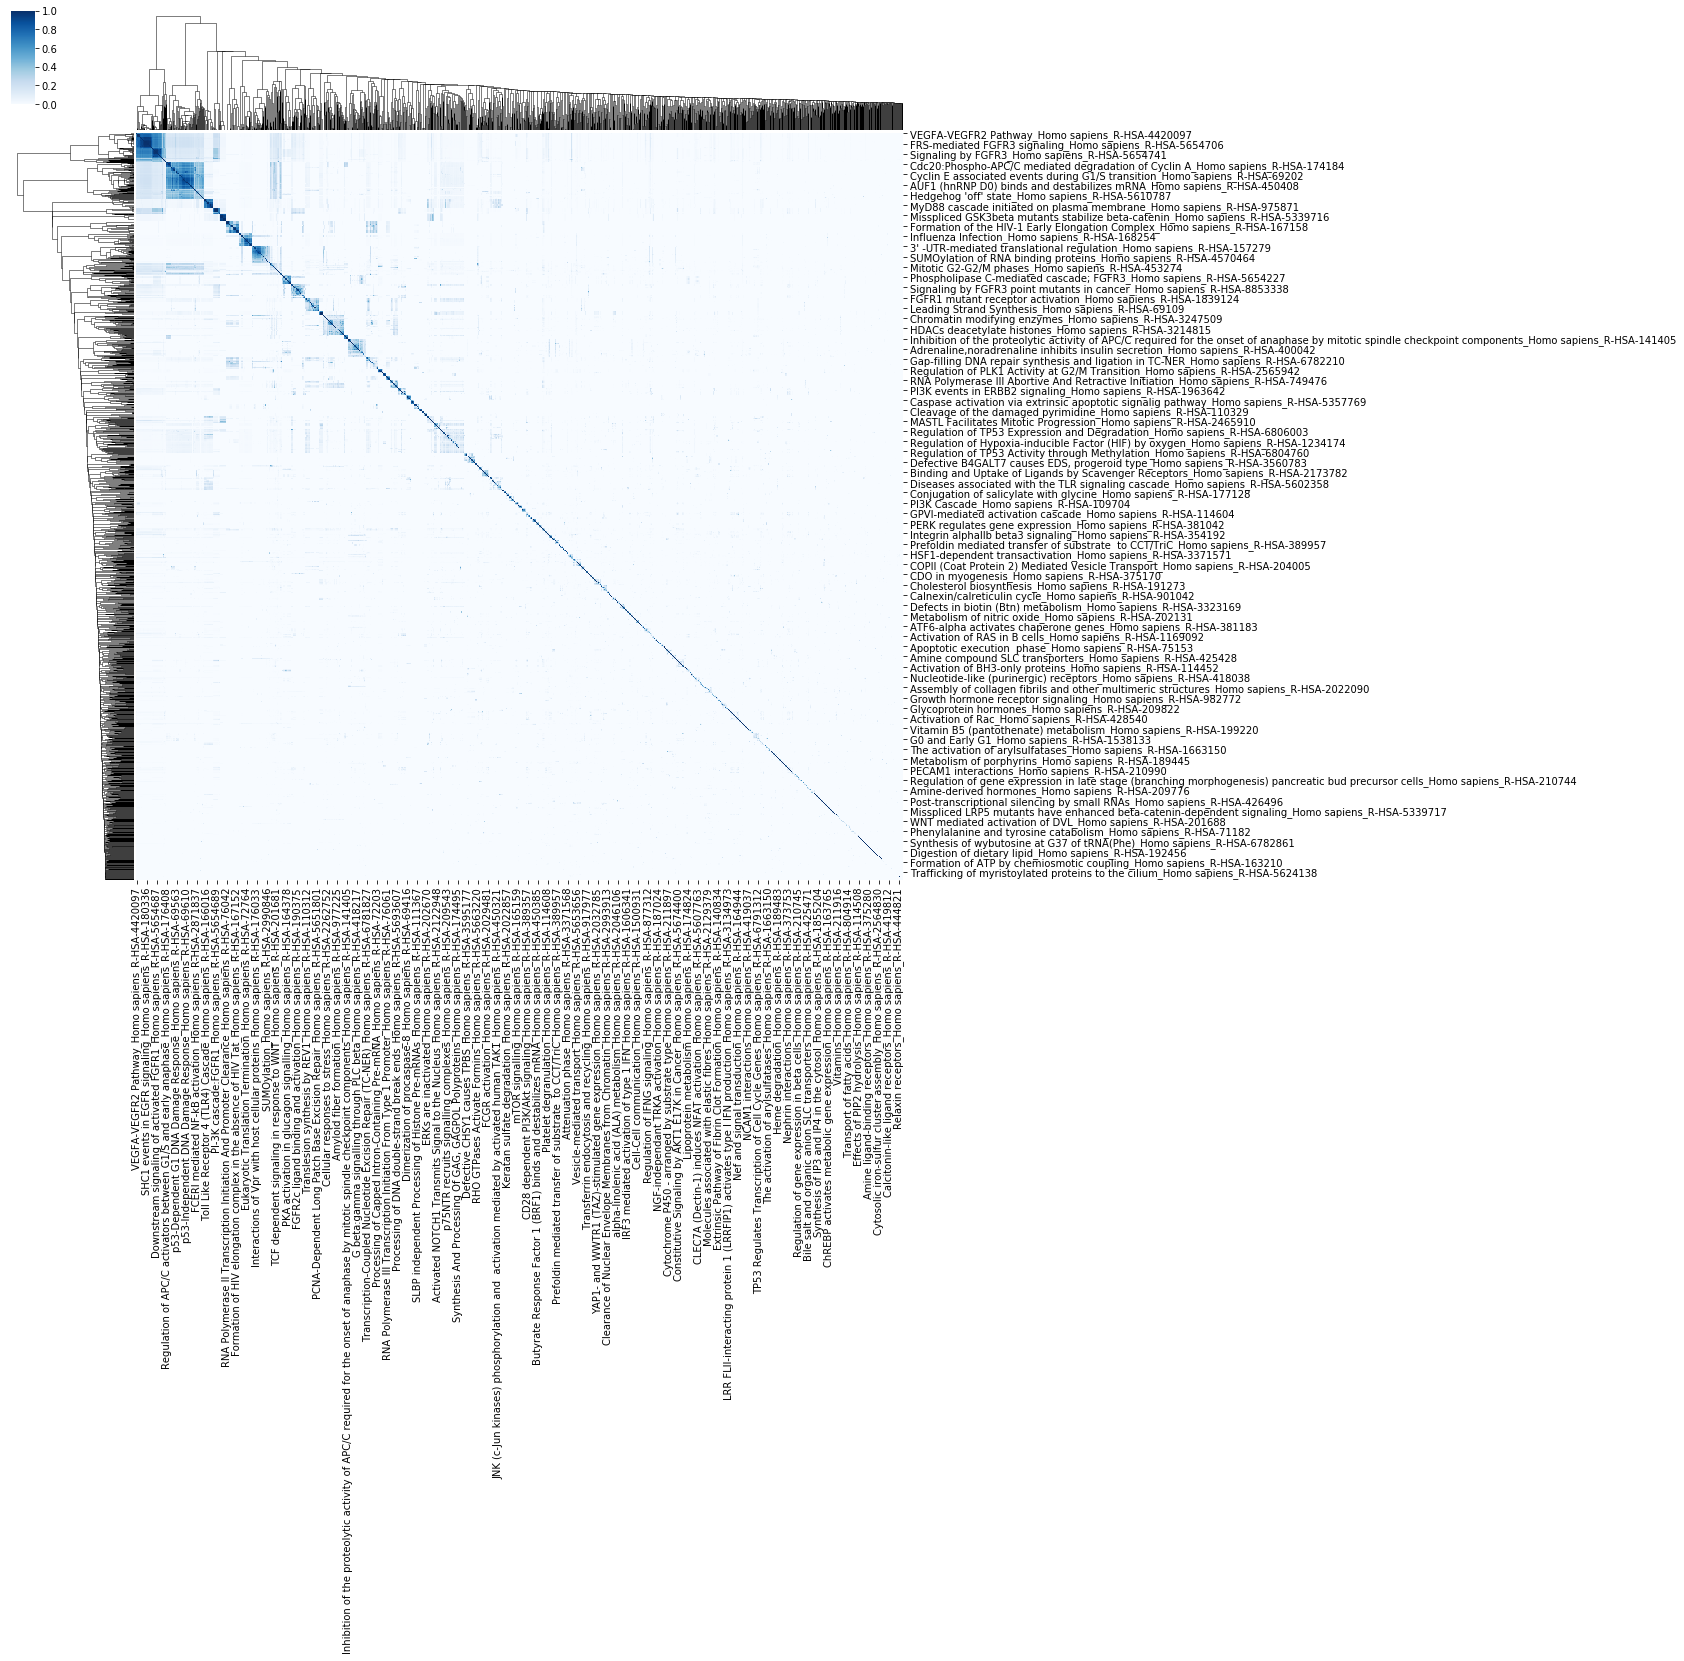

In [28]:
grid = sns.clustermap(dj, cmap='Blues', figsize=(16, 16))

### Enrichment run

In [6]:
enr = erl.enrich(gl, gs)

Text(0.5,1,'Reactome_2016')

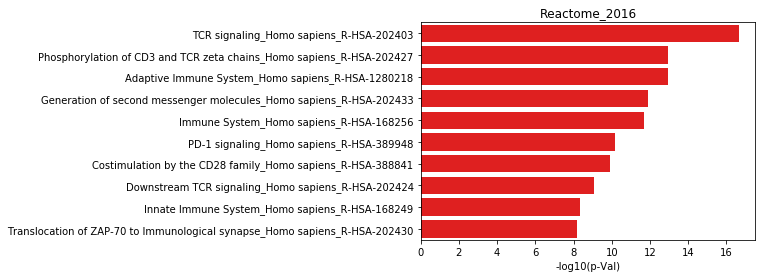

In [7]:
# Plot result as barplot and compare with EnrichR image

import seaborn as sns

ds = enr.head(10)
sns.barplot(y=ds.index,
                x='-log10(p-Val)', 
                color="Red",
                data = ds)
plt.title(gsn)

In [8]:
dj = erl.jaccard_matrx(enr)

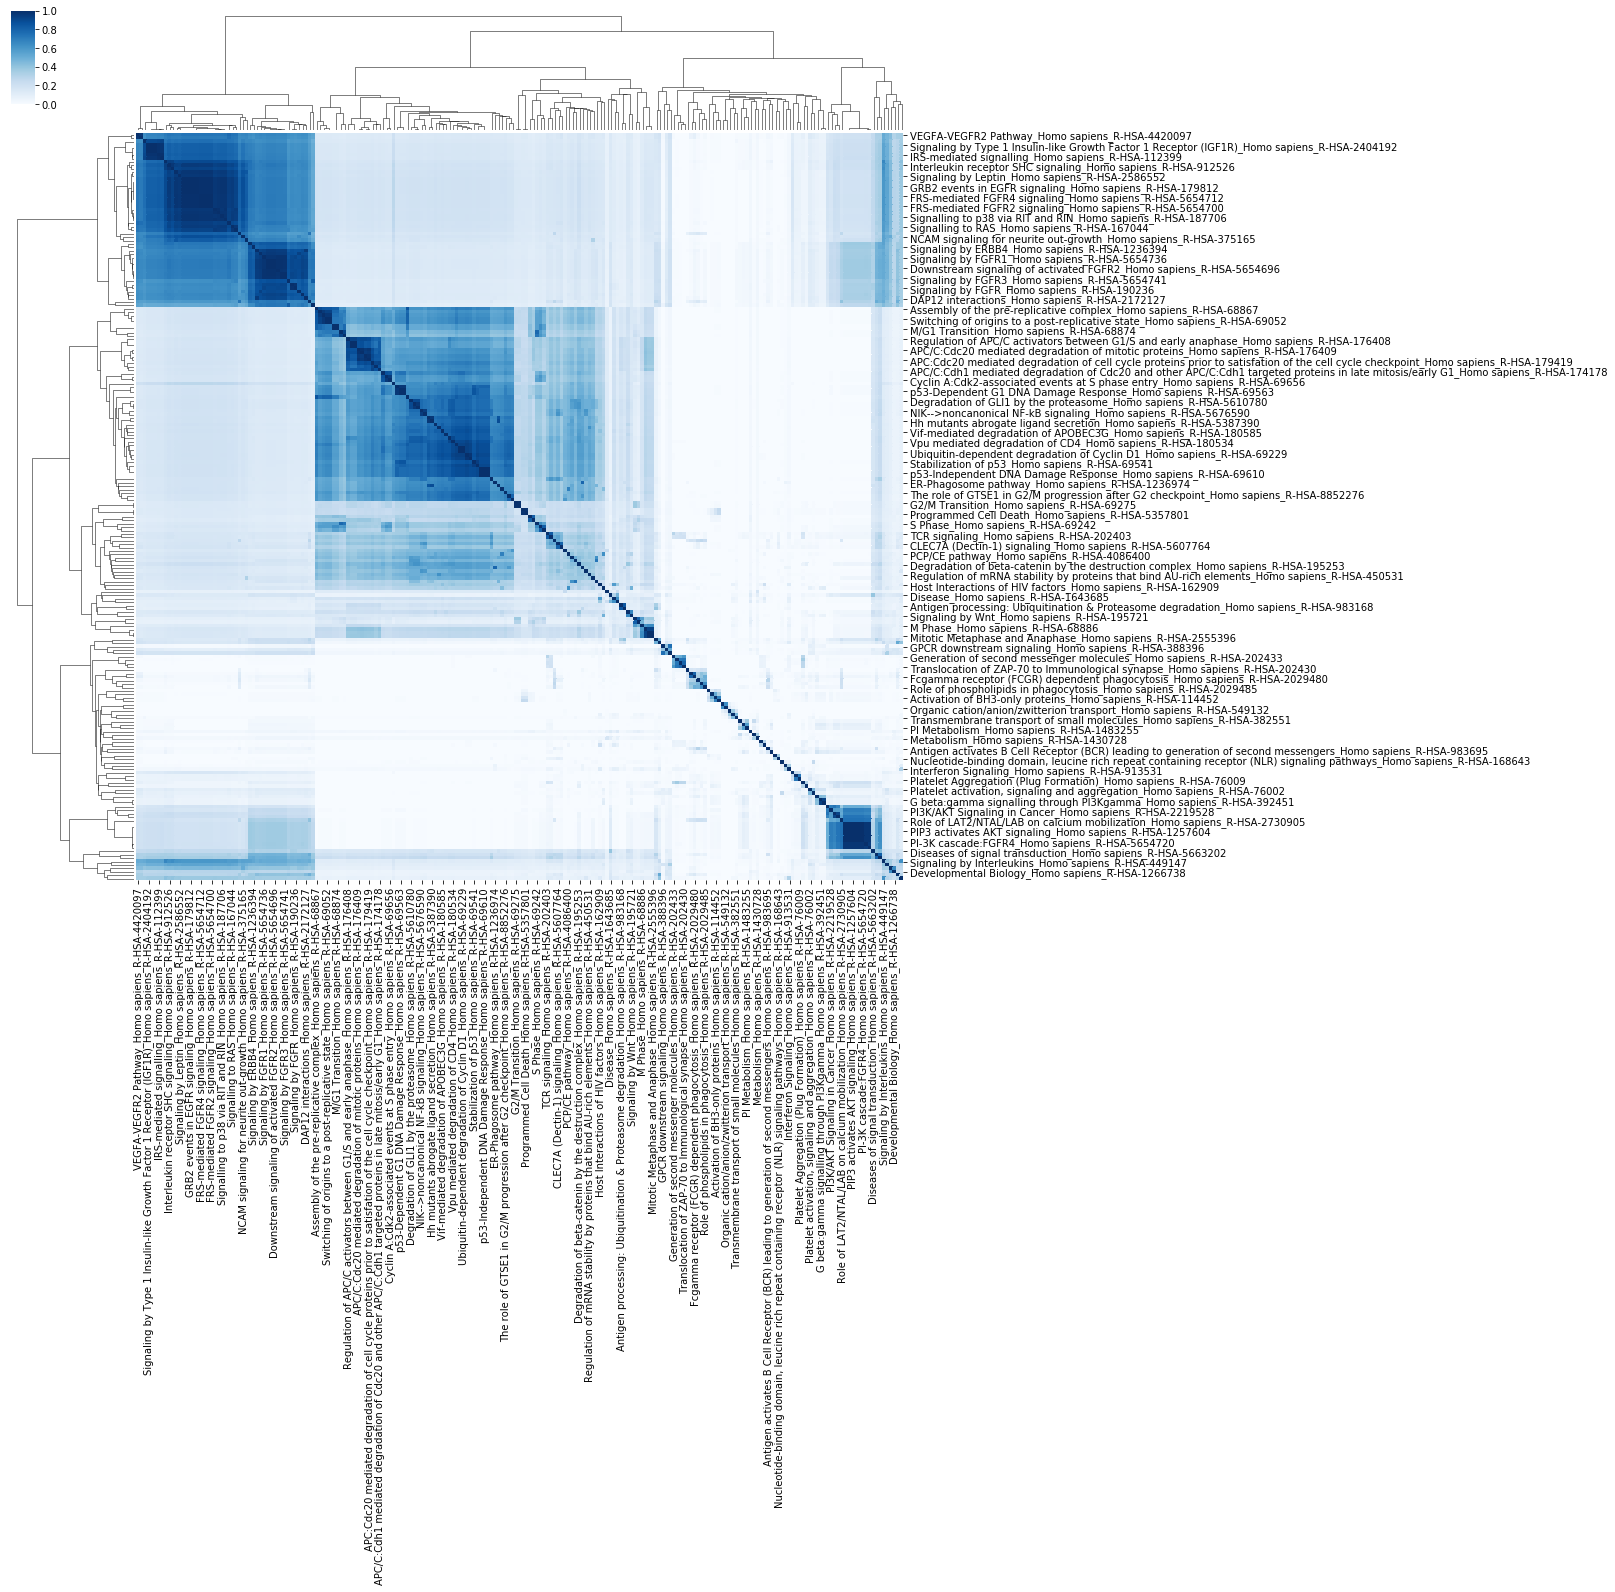

In [9]:
grid = sns.clustermap(dj, cmap='Blues', figsize=(16, 16))

# Enrichment of several gene sets: batch analysis

In [ ]:
# List of gene sets as above
gss = [ 
       'GO_Biological_Process_2018',
       'GO_Cellular_Component_2018',
       'GO_Molecular_Function_2018',
       'KEGG_2016',
       'Reactome_2016'
       ]

### Batch enrichment 

In [ ]:
enrr = erl.enrich_gs(gl,gss, path_lib=lib_dir)

### Plots 

In [ ]:
enrr.sort_values('p-Val', axis=0, inplace = True)
ds = enrr.head(20)

f, ax = plt.subplots()
sns.barplot(y=ds.index,
            x='-log10(p-Val)',
            ax = ax, 
            color="Red", 
            data = ds)
ax.set_title('All terms')

# Clustering 

In [ ]:
# For futher analysis it is convinient to filter terms by p-value for
enrr = enrr[enrr['p-Val']<0.001]
len(enrr)

## Calculate closeness by kappa-score

In [ ]:
dd = erl.kappa_matrx(gl,enrr)

In [ ]:
## Show cluster based on kappa-score closeness

grid = sns.clustermap(dd, cmap='Blues', figsize=(16, 16))

## Clastering:  top level

In [ ]:
## Cluster: this calculate and add cluster number column
enrr = erl.cluster(gl,enrr)

# Make additional calculation on existing columns for visualization
enrr.loc[:,'ass_genes_percnt'] = 100*enrr.loc[:,'num_list']/enrr.loc[:,'num_term']
enrr.sort_values('cluster', axis=0, inplace = True)

# use consistent discrete palette
cm = 'tab20'

ds = enrr.head(40)

f, ax = plt.subplots(figsize=(18.5, 8.5))
sns.barplot(y=ds.index,
            x='-log10(p-Val)',
            ax = ax, 
            hue ='cluster',
            dodge=False,
            data = ds,
            palette = cm)
ax.set_title('All terms')

In [ ]:
f, ax = plt.subplots(figsize=(18.5, 8.5))
sns.barplot(y=ds.index,
            x='ass_genes_percnt',
            ax = ax, 
            hue ='cluster', 
            dodge=False,
            data = ds,
            palette = cm)
ax.set_title('All terms')
ax.set_xlabel('%Genes/Term')

# Network construction based on cluster

In [ ]:
## Graph and network
## control conectivity by kappa score parameter, default kappa=0.4
nt, nt_tb, G = erl.make_graph(gl, enrr, kappa=0.4, draw=True, palette=cm)

## Exporting network tables for Cytoscape

In [ ]:
# If save result and network for Cytoscape
exp_name='GO_KEGG_React'

SAVE = True

if SAVE:
    enrr.to_csv(exp_name+'-enrich.txt', sep="\t")
    nt.to_csv(exp_name+'-network.txt', sep="\t")
    nt_tb.to_csv(exp_name+'-network_table.txt', sep="\t")

![title](im/React2016_EnrichTest_net.png)

# ClueGO for same gene list and coresponding gene sets

![title](im/React2016_EnrichTest_netClue.png)

In [ ]:
import networkx as nx
cl = [G.nodes[v]['cluster'] for v in G] 
sz = [G.nodes[v]['mlog10pVal']*100 for v in G] 

f1, ax1 = plt.subplots(figsize=(10, 10))
     
nx.draw(G, pos=nx.kamada_kawai_layout(G),
        with_labels = True, 
        node_color = cl,
        node_size =  sz,
        font_size=8,
        cmap = cm) 
